In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
import matplotlib.pyplot as plt

##### Load the OCR letter recognition dataset, Link
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
dataset = pd.read_csv(url, header=None)

In [2]:
# Load the OCR letter recognition dataset
url = 'letter-recognition.data'
dataset = pd.read_csv(url, header=None)

In [3]:
# Split the dataset into features and labels
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [4]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

y = np_utils.to_categorical(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
print(X_train)

[[ 3  8  4 ...  8  6  8]
 [ 5 11  7 ...  7  8  8]
 [ 6 10  9 ...  8  6  7]
 ...
 [ 7  9  6 ...  8  3  4]
 [ 3  1  4 ...  5  2  8]
 [ 4  8  5 ... 10  3  5]]


In [7]:
X_train = X_train / 15.0
X_test = X_test / 15.0

In [8]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(16,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])


In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=12)

Epoch 1/50
1334/1334 [==============================] - 4s 3ms/step - loss: 2.6270 - accuracy: 0.2198 - val_loss: 1.7439 - val_accuracy: 0.5590
Epoch 2/50
1334/1334 [==============================] - 3s 3ms/step - loss: 1.8664 - accuracy: 0.4156 - val_loss: 1.3782 - val_accuracy: 0.6298
Epoch 3/50
1334/1334 [==============================] - 3s 2ms/step - loss: 1.6212 - accuracy: 0.4851 - val_loss: 1.2188 - val_accuracy: 0.6488
Epoch 4/50
1334/1334 [==============================] - 3s 2ms/step - loss: 1.4714 - accuracy: 0.5333 - val_loss: 1.0904 - val_accuracy: 0.6920
Epoch 5/50
1334/1334 [==============================] - 3s 2ms/step - loss: 1.3977 - accuracy: 0.5561 - val_loss: 1.0518 - val_accuracy: 0.6980
Epoch 6/50
1334/1334 [==============================] - 3s 2ms/step - loss: 1.3306 - accuracy: 0.5778 - val_loss: 0.9640 - val_accuracy: 0.7262
Epoch 7/50
1334/1334 [==============================] - 3s 2ms/step - loss: 1.2732 - accuracy: 0.5916 - val_loss: 0.9290 - val_accuracy:

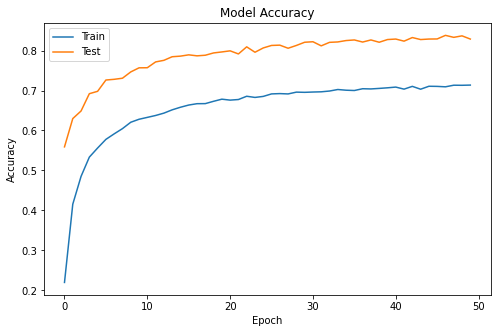

In [11]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

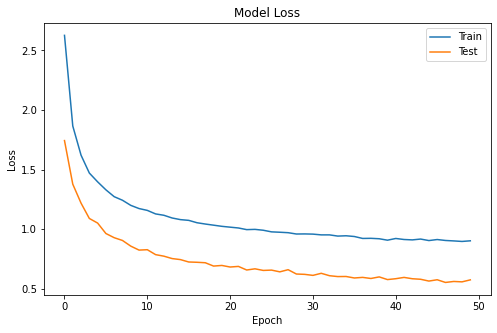

In [12]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)
print("Test loss:", loss)

125/125 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.8288
Test accuracy: 0.8287500143051147
Test loss: 0.5750145316123962


In [14]:
model.save('ocr_model.h5')
# Save the trained model

In [15]:
from tensorflow.keras.models import load_model
model = load_model('ocr_model.h5')
# Load the trained model

In [16]:
sample_records = X_test[:1000]
# Select a few records for classification

In [17]:
# Perform classification
predictions = model.predict(sample_records)

In [18]:
predicted_labels = np.argmax(predictions, axis=1)

In [19]:
predicted_letters = label_encoder.inverse_transform(predicted_labels)
actual_letters = label_encoder.inverse_transform(y_test)

In [20]:
# Calculate accuracy
accuracy = np.sum(predicted_labels == y[:1000]) / len(predicted_labels)

In [21]:
# Print the predicted labels and corresponding actual labels
print("Predicted Labels\tActual Labels")
for i in range(len(predicted_letters)):
    print(f"{predicted_letters[i]}\t\t\t{actual_letters[i]}")

Predicted Labels	Actual Labels
D			D
D			D
V			V
B			B
H			H
N			N
B			E
Q			Q
X			R
N			N
Q			Q
O			O
N			N
D			D
I			I
M			M
U			U
S			S
O			O
A			A
X			X
A			A
K			K
S			S
O			O
V			V
Y			Y
J			J
D			D
V			V
N			D
V			V
K			K
Y			F
N			N
I			I
G			G
T			T
H			H
K			K
J			J
O			O
M			M
T			T
B			B
Q			Q
Z			Z
C			C
D			D
X			X
K			C
G			G
Q			Q
F			F
N			N
Y			Y
Z			Z
K			K
S			C
K			T
M			M
V			V
Q			G
W			M
D			D
T			T
H			H
P			P
N			N
C			C
O			O
X			X
D			X
Q			Q
V			V
F			P
V			V
C			G
W			W
O			H
P			P
O			O
I			I
G			G
X			X
Y			X
Y			P
W			W
O			Q
D			D
B			N
G			Q
T			T
T			T
V			V
Y			Y
T			T
V			V
J			J
M			U
D			D
L			L
M			M
P			Y
E			E
M			M
A			A
Y			Y
K			K
Y			Y
U			U
U			U
U			U
E			C
Q			Q
I			I
A			A
E			E
D			D
T			T
B			P
Q			Q
Z			Z
G			G
X			X
G			G
F			F
M			M
S			S
E			E
E			E
K			K
Z			Z
X			X
O			O
E			E
U			U
I			I
R			R
O			O
M			M
J			J
F			F
K			K
M			M
N			N
G			T
D			D
H			H
R			R
L			L
Z			Z
F			F
V			V
W			W
E			E
T			T
W			W
Y			Y
Q			Q
L			L
F		